# Part 2: Rediscover the Higgs boson

In [1]:
import uproot as uproot
import numpy as np
import pandas as pd
import vector
import matplotlib.pyplot as plt
import scipy.stats

# Step 1: Access a the data file and convert into a 'pandas dataframe'.


In [2]:
eventsData = uproot.open("data_Skim_GamGam.root")["mini"]
df = eventsData.arrays(["photon_pt", "photon_eta", "photon_phi", "photon_E",  "diphoton_mass"], library="pd")
df

,photon_pt,photon_eta,photon_phi,photon_E,diphoton_mass
0,[35529.6875 29579.59765625],[1.0483403205871582 1.2933013439178467],[1.587436556816101 -1.533585548400879],[56908.45703125 57963.6328125],65320.367188
1,[176121.15625 39629.14453125],[-0.8334919810295105 0.0947030708193779],[-0.29423871636390686 0.5672937631607056],[240922.3125 39806.98828125],106420.710938
2,[100427.6796875 95522.5703125],[1.7343542575836182 0.6880435943603516],[0.6559551954269409 -2.4571521282196045],[293338.34375 119039.1328125],223294.968750
3,[38297.3046875 32480.755859375],[0.05254824459552765 -0.8327684998512268],[-1.5148577690124512 1.7095263004302979],[38350.19140625 44409.64453125],77508.187500
4,[45906.0859375 34899.7421875],[0.560444176197052 -0.18553611636161804],[-2.951354503631592 -0.023520486429333687],[53306.27734375 35502.15625],85259.531250
...,...,...,...,...,...
362857,[43045.76953125 40133.7265625],[-0.058136601001024246 -0.9188442826271057],[-2.6306653022766113 1.5349340438842773],[43118.53515625 58301.69921875],81317.265625
362858,[58404.52734375 31240.412109375],[1.2870874404907227 0.5270840525627136],[0.431402325630188 0.8467892408370972],[113839.0390625 35681.3828125],37628.792969
362859,[92575.0390625 86869.7265625],[1.1143873929977417 2.2200980186462402],[2.3199832439422607 -1.107298731803894],[156258.1875 404675.3125],205891.906250
362860,[77078.1171875 46948.61328125],[0.8463831543922424 1.1342076063156128],[-1.699459195137024 0.5268324613571167],[106374.109375 80525.9375],109320.015625


 NOTE - NONE OF THE REST OF THIS NOTEBOOK WILL RUN UNTIL YOU DOWNLOAD THE INPUT DATA AND SIMULATION FILES FROM HERE. 

 - https://uctcloud-my.sharepoint.com/:f:/g/personal/01466689_wf_uct_ac_za/En-_dYktEINOu3XP2z3VDK8B3NCT_Wj7shIBVCcV72SkAg?e=cu1Ldy

 - PLACE ALL FILES IN THE SAME DIRECTORY AS THIS NOTEBOOK.

# Step 2. Apply a series of event selections
    - only select events containing two photons with specific pt and eta

In [3]:
cuts0 = df[(df['photon_pt'].apply(lambda x: x[0]) > 35000) & (df['photon_pt'].apply(lambda x: x[1]) > 25000)]

cuts1 = cuts0[(np.abs(cuts0['photon_eta'].apply(lambda x: x[0])) < 2.37) & (np.abs(cuts0['photon_eta'].apply(lambda x: x[1])) < 2.37)]

# Alternative eta cut, selects central photons only
# cuts1 = cuts0[(np.abs(cuts0['photon_eta'].apply(lambda x: x[0])) < 0.75) & (np.abs(cuts0['photon_eta'].apply(lambda x: x[1])) < 0.75)]

# These cuts exclude a small region of the ATLAS detector known to have poor efficiency and resolution.
cuts1a = cuts1[(np.abs(cuts1['photon_eta'].apply(lambda x: x[0])) < 1.37) | (np.abs(cuts1['photon_eta'].apply(lambda x: x[0])) > 1.52)]
cuts1b = cuts1a[(np.abs(cuts1a['photon_eta'].apply(lambda x: x[1])) < 1.37) | (np.abs(cuts1a['photon_eta'].apply(lambda x: x[1])) > 1.52)]

# Here we apply kinematic criteria that removes diphotons that are just random combinations
cuts2a = cuts1b[(cuts1b['photon_pt'].apply(lambda x: x[0]) / cuts1b['diphoton_mass']) > 0.35]
cuts2b = cuts2a[(cuts2a['photon_pt'].apply(lambda x: x[1]) / cuts2a['diphoton_mass']) > 0.25]

# finally we only look in the diphoton mass regions close to the known higgs mass
cuts3 = cuts2b[(cuts2b['diphoton_mass'].apply(lambda x: x)) > 105000.0]

finalData = cuts3

print("Number of selected events = " + str(len(finalData.index)))
finalData

Number of selected events = 103940


,photon_pt,photon_eta,photon_phi,photon_E,diphoton_mass
1,[176121.15625 39629.14453125],[-0.8334919810295105 0.0947030708193779],[-0.29423871636390686 0.5672937631607056],[240922.3125 39806.98828125],106420.710938
2,[100427.6796875 95522.5703125],[1.7343542575836182 0.6880435943603516],[0.6559551954269409 -2.4571521282196045],[293338.34375 119039.1328125],223294.968750
5,[59702.84375 36279.23046875],[-0.49672460556030273 0.9447341561317444],[-1.2497646808624268 1.4425605535507202],[67220.9375 53709.8125],116489.304688
6,[93071.2421875 50926.99609375],[2.3203492164611816 1.053870677947998],[-1.5707906484603882 1.293744683265686],[478268.34375 81924.2109375],165143.859375
7,[134294.21875 115627.078125],[0.7709693312644958 0.49331459403038025],[-0.5256499648094177 2.5920231342315674],[176222.578125 129984.1953125],251611.031250
...,...,...,...,...,...
362853,[177756.8125 158600.484375],[-0.49995315074920654 0.22985273599624634],[-0.8511518239974976 2.2011477947235107],[200438.859375 162808.578125],358104.375000
362856,[57474.22265625 55986.33984375],[0.2081649750471115 0.1890438348054886],[0.07692185044288635 -3.027287483215332],[58723.98046875 56989.73046875],113436.171875
362859,[92575.0390625 86869.7265625],[1.1143873929977417 2.2200980186462402],[2.3199832439422607 -1.107298731803894],[156258.1875 404675.3125],205891.906250
362860,[77078.1171875 46948.61328125],[0.8463831543922424 1.1342076063156128],[-1.699459195137024 0.5268324613571167],[106374.109375 80525.9375],109320.015625


# Step 3. Combine the four vectors of the photons

In [4]:
#first we make arrays of four-vectors for the muons. we make separate arrays for leading and sub-leading muons
pt0 = finalData['photon_pt'].apply(lambda x: x[0]).to_numpy()
eta0 = finalData['photon_eta'].apply(lambda x: x[0]).to_numpy()
phi0 = finalData['photon_phi'].apply(lambda x: x[0]).to_numpy()
E0 = finalData['photon_E'].apply(lambda x: x[0]).to_numpy()

pt1 = finalData['photon_pt'].apply(lambda x: x[1]).to_numpy()
eta1 = finalData['photon_eta'].apply(lambda x: x[1]).to_numpy()
phi1 = finalData['photon_phi'].apply(lambda x: x[1]).to_numpy()
E1 = finalData['photon_E'].apply(lambda x: x[1]).to_numpy()

lvArray0 = vector.array(
    {
        "pt": pt0,
        "phi": phi0,
        "eta": eta0,
        "E": E0,
    }
)

lvArray1 = vector.array(
    {
        "pt": pt1,
        "phi": phi1,
        "eta": eta1,
        "E": E1,
    }
)

lvArray = lvArray0 + lvArray1
lvArray


MomentumNumpy4D([(204157.59375571, -0.14640164, -0.722338  , 280729.30078125),
                 (  5643.00945451,  0.152879  ,  4.81109681, 412377.4765625 ),
                 ( 31281.69056518, -0.72189963,  0.2750996 , 120930.75      ), ...,
                 ( 26162.39434345, -2.75281467,  3.68544207, 560933.5       ),
                 ( 61103.38624309, -1.04452859,  1.55844443, 186900.046875  ),
                 ( 72494.806689  ,  0.50237323, -2.38161623, 410486.59375   )],
                dtype=[('rho', '<f8'), ('phi', '<f8'), ('eta', '<f8'), ('t', '<f8')])

# Step 4. Create a histogram of the masses of the diphoton system.

In [5]:
mH = 124894.0
sigmaH = 210.0

#example binning
nBins = 30
minMass = 105000
maxMass = 160000

countsData, edges = np.histogram(lvArray.mass, bins=nBins, range=(minMass,maxMass))

#create an array of the centre of each bin, useful for plotting the pdf later
centres = (edges[1:] + edges[:-1]) / 2

# Step 5. Fit a background model to data and make a comparison plot.

- create a statistical model for the diphoton mass distribution composed of of a gaussian ('norm') pdf for the $H\rightarrow \gamma \gamma$ process and a third-order polynomial fuction for the background diphoton processes. The mean of the signal gauusian distribution is chosen as the measured $m_{H}$ value.

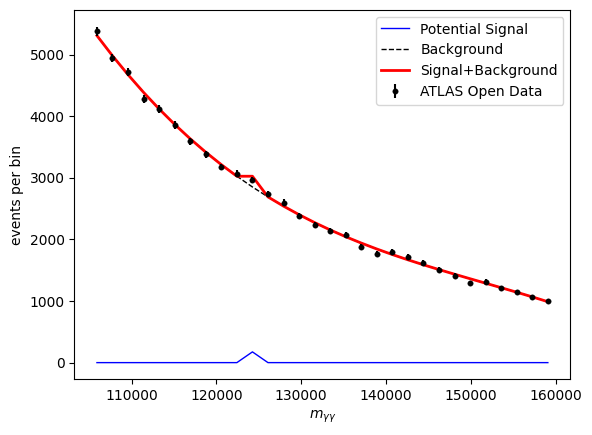

In [6]:
b = np.poly1d(np.polyfit(centres, countsData, 3))

#guess a signal integral for illustration purposes
integral = 10113802.23

s = ( scipy.stats.norm.pdf(centres, mH, sigmaH) * integral)
sb = s+b(centres)

plt.figure()
plt.xlabel("$ m_{\gamma\gamma}$")
plt.ylabel("events per bin")
plt.plot(centres, s, 'b', linewidth=1, label="Potential Signal")
plt.plot(centres, b(centres), 'k', linewidth=1, linestyle="--", label="Background")
plt.plot(centres, sb, 'r', linewidth=2, label="Signal+Background")

plt.errorbar(centres, countsData, yerr=np.sqrt(countsData), fmt='o', mfc='k', mec='k',ms=4, mew=0.2, ecolor='k',label="ATLAS Open Data",)
plt.legend()

# Step 6. Create a plot of the binned "residuals" vs $m_{H}$

- Subtract the polynomial background prediction from the data to calculate the \emph{residuals}. 
- The residual in each bin is our estimate of the signal in that bin.

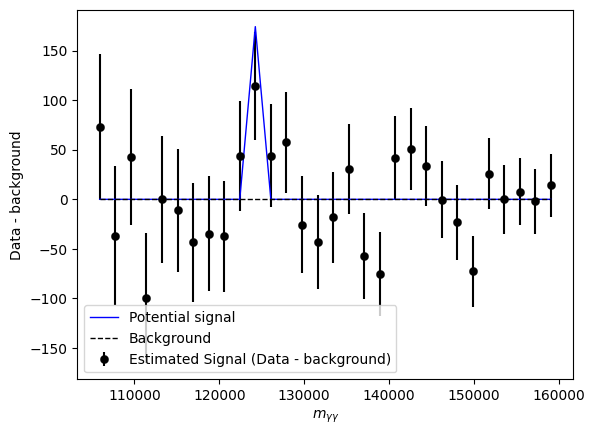

CPU times: user 381 ms, sys: 78.3 ms, total: 459 ms
Wall time: 235 ms


In [7]:
%%time
#ratio plot 
residuals = countsData - b(centres) 
plt.figure()
plt.xlabel("$ m_{\gamma\gamma}$")
plt.ylabel("Data - background")
plt.errorbar(centres, residuals, yerr=np.sqrt(countsData), label="Estimated Signal (Data - background)", fmt='o', mfc='k', mec='k', mew=0.2, ecolor='k')

nSteps = 100

plt.plot(centres, s, 'b', linewidth=1, label="Potential signal")
plt.plot(centres, np.zeros(len(centres)), 'k', linewidth=1, linestyle="--", label="Background")
plt.legend()
plt.show()

# Step 7.  Simultaneously fit  $m_{H}$, $\Gamma_{H}$ and $N_{H\rightarrow\gamma\gamma}$ from the residuals
- If we assume the signal will have a gaussian shape with $\mu \approx m_{H} \approx$ 125000 MeV, we can use python libraries to fit a gaussian distrubution to the residual graph and estimate the number of signal events $N_{H\rightarrow\gamma\gamma}$ in the data as well as $m_{H}$ and $\Gamma_{H}$.

best fitting parameters:
MH = 124437.52136005287
sigmaH = 110.93544019327686
NH = 728.2075326692104


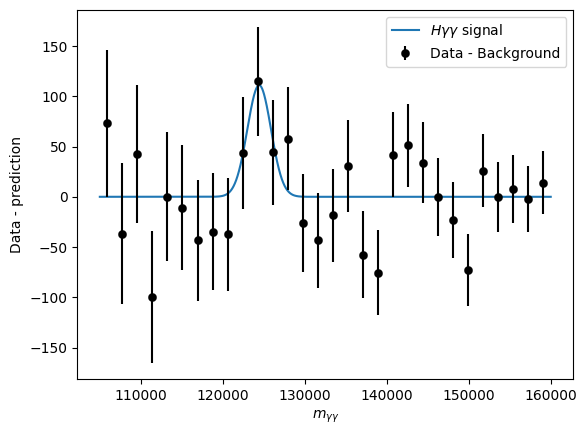

In [8]:
#assume mass, sigma
from scipy.optimize import curve_fit

def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

bestFitParams, covarianceMatrix = curve_fit(gaussian, centres, residuals, p0=[125000., 200., 1000.])

#the p0 values are that the 'starting points' for 𝑚𝐻, Γ𝐻 and 𝑁𝐻→𝛾𝛾 in the fit.

x_interval_for_fit = np.linspace(edges[0], edges[-1], 10000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *bestFitParams), label='$ H \gamma \gamma$ signal')
plt.errorbar(centres, residuals, yerr=np.sqrt(countsData), label="Data - Background", fmt='o', mfc='k', mec='k', mew=0.2, ecolor='k')
plt.legend()
plt.xlabel("$ m_{\gamma\gamma}$")
plt.ylabel("Data - prediction")

# add the values of thr fitted signal shape at a series of points to estimate the total 
# number of signal events
limA = 11500
limA = 13500
sigIntegral = 0.0
stepSize = (maxMass - minMass)/(nSteps)

xStep = minMass

for p in range(0, nSteps):
        xStep = xStep + stepSize
        sigHeight = gaussian(xStep, *bestFitParams)
        #print(sigHeight)
        sigIntegral = (sigIntegral + (sigHeight) )

print("best fitting parameters:")
print("MH = " + str(float(bestFitParams[0])))
print("sigmaH = " + str(float(bestFitParams[1]) ))
print("NH = " + str(float(sigIntegral) ))

# Step 8  Estimate the statistical significance of the $H\rightarrow \gamma \gamma$ signal.




In [9]:
#Your code goes here!

# Step 9 - Your turn!

It's time for you to try improvements to the analysis especially if they can improve the significance of the signal.
Refer to the lab manual for suggested modifications.

